In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv("Lyrics_Labeled.csv") 
data

,Lyrics,Label
0,Two young people without a thing Say some vows...,0
1,"Here we are, talkin' 'bout forever Both know d...",0
2,When I look into your soft green eyes And when...,0
3,Way down yonder on the Chattahoochee It gets h...,0
4,Have a little love on a little honeymoon You g...,0
...,...,...
17156,Live as one will come a son Love's a thing tha...,3
17157,"Alright, my name's Gary. Let's go, it's beat t...",3
17158,"Met her on a blind date, helping out an old ma...",3
17159,"Got a reason to laugh, Got a reason to cry. Be...",3


In [3]:
# Function to clean lyrics
def clean_lyrics(lyrics):
    # Lowercasing
    lyrics = lyrics.lower()

    # Removing HTML tags
    lyrics = BeautifulSoup(lyrics, "html.parser").get_text()

    # Replacing numbers with "NUM"
    lyrics = re.sub(r'\b\d+\b', 'NUM', lyrics)

    # Replacing question marks and exclamation points with "SYMB"
    lyrics = re.sub(r'[!?]', 'SYMB', lyrics)

    # Removing special characters and punctuation (except for question marks and exclamation points)
    lyrics = re.sub(r'[^a-zA-Z\sSYMB ]', '', lyrics)

    return lyrics


In [4]:
data['clean_lyrics'] = data['Lyrics'].apply(clean_lyrics)

/var/folders/7f/8qvp9gms6wl51x9hsz75ckmh0000gn/T/ipykernel_3329/3126897913.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lyrics = BeautifulSoup(lyrics, "html.parser").get_text()


In [5]:
data

,Lyrics,Label,clean_lyrics
0,Two young people without a thing Say some vows...,0,two young people without a thing say some vows...
1,"Here we are, talkin' 'bout forever Both know d...",0,here we are talkin bout forever both know damn...
2,When I look into your soft green eyes And when...,0,when i look into your soft green eyes and when...
3,Way down yonder on the Chattahoochee It gets h...,0,way down yonder on the chattahoochee it gets h...
4,Have a little love on a little honeymoon You g...,0,have a little love on a little honeymoon you g...
...,...,...,...
17156,Live as one will come a son Love's a thing tha...,3,live as one will come a son loves a thing that...
17157,"Alright, my name's Gary. Let's go, it's beat t...",3,alright my names gary lets go its beat time it...
17158,"Met her on a blind date, helping out an old ma...",3,met her on a blind date helping out an old mat...
17159,"Got a reason to laugh, Got a reason to cry. Be...",3,got a reason to laugh got a reason to cry beli...


In [6]:
def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

# Apply the count_words function to the 'Lyrics' and 'clean_lyrics' columns
data['word_count_lyrics'] = data['Lyrics'].apply(count_words)
data['word_count_clean_lyrics'] = data['clean_lyrics'].apply(count_words)

# Calculate the average word count
average_word_count_lyrics = data['word_count_lyrics'].mean()
average_word_count_clean_lyrics = data['word_count_clean_lyrics'].mean()

# Display the results
print(f"Average Word Count in 'Lyrics': {average_word_count_lyrics:.2f}")
print(f"Average Word Count in 'clean_lyrics': {average_word_count_clean_lyrics:.2f}")

Average Word Count in 'Lyrics': 282.63
Average Word Count in 'clean_lyrics': 267.30


In [7]:
### Lemmatization & Removing Stop Words 

import spacy
from spacy.lang.en.stop_words import STOP_WORDS


nlp = spacy.load('en_core_web_sm')
nlp.Defaults.stop_words |= {" f ", " s ", " etc"}
stop_words = set([w.lower() for w in list(STOP_WORDS)])

In [9]:
from tqdm import tqdm

In [10]:
# Define a function for lemmatization
def lemmatize_text(text):
    return ' '.join([word.lemma_ for word in nlp(text)])
# Apply lemmatization using tqdm for progress tracking
tqdm.pandas()
data['lemmatiz'] = data['clean_lyrics'].progress_apply(lemmatize_text)

100%|█████████████████████████████████████| 17161/17161 [14:56<00:00, 19.14it/s]


In [12]:
additional_stop_words = {
    'chorus', 'verse', 'pre-chorus', 'bridge',  # Common song sections
    'instrumental', 'guitar', 'drums', 'bass', 'solo',  # Instrument-related terms
    'guitar solo', 'drum solo', 'bass solo',  # Common solo references
    # Add more terms that are specific to the common themes or elements in your dataset
}
extended_stop_words = stop_words.union(additional_stop_words)


In [13]:
#remove stopwords
data['remove_stop_words'] = data.lemmatiz.progress_apply(lambda series: ' '.join([word for word in series.split() if word not in stop_words]))

100%|██████████████████████████████████| 17161/17161 [00:01<00:00, 15989.49it/s]


In [14]:
# Apply the count_words function to the 'Lyrics' and 'clean_lyrics' columns
data['word_count_lemmatiz'] = data['lemmatiz'].apply(count_words)
data['word_count_stop_words'] = data['remove_stop_words'].apply(count_words)


In [18]:
label_to_genre = {0: 'Country', 1: 'Hip-Hop', 2: 'Indie', 3: 'Rock'}
data['Genre'] = data['Label'].map(label_to_genre)
data

,Lyrics,Label,clean_lyrics,word_count_lyrics,word_count_clean_lyrics,lemmatiz,remove_stop_words,word_count_lemmatiz,word_count_stop_words,Genre
0,Two young people without a thing Say some vows...,0,two young people without a thing say some vows...,217,204,two young people without a thing say some vow ...,young people thing vow spread wing settle need...,215,95,Country
1,"Here we are, talkin' 'bout forever Both know d...",0,here we are talkin bout forever both know damn...,131,114,here we be talkin bout forever both know damn ...,talkin bout forever know damn easy ve feel lov...,119,59,Country
2,When I look into your soft green eyes And when...,0,when i look into your soft green eyes and when...,161,155,when I look into your soft green eye and when ...,I look soft green eye I delicate body reveal I...,158,73,Country
3,Way down yonder on the Chattahoochee It gets h...,0,way down yonder on the chattahoochee it gets h...,257,254,way down yonder on the chattahoochee it get ho...,way yonder chattahoochee hot hoochie coochie l...,256,125,Country
4,Have a little love on a little honeymoon You g...,0,have a little love on a little honeymoon you g...,267,261,have a little love on a little honeymoon you g...,little love little honeymoon little dish littl...,262,130,Country
...,...,...,...,...,...,...,...,...,...,...
17156,Live as one will come a son Love's a thing tha...,3,live as one will come a son loves a thing that...,33,32,live as one will come a son love a thing that ...,live come son love thing love sing love tame w...,32,17,Rock
17157,"Alright, my name's Gary. Let's go, it's beat t...",3,alright my names gary lets go its beat time it...,146,127,alright my name gary let go its beat time its ...,alright gary let beat time hop time monk time ...,134,75,Rock
17158,"Met her on a blind date, helping out an old ma...",3,met her on a blind date helping out an old mat...,234,229,meet she on a blind date help out an old mate ...,meet blind date help old mate wait corner s dr...,232,100,Rock
17159,"Got a reason to laugh, Got a reason to cry. Be...",3,got a reason to laugh got a reason to cry beli...,35,33,get a reason to laugh get a reason to cry beli...,reason laugh reason cry believe wise dumb worl...,35,14,Rock


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


/Users/carolinacraus/anaconda3/envs/cap-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolinacraus/anaconda3/envs/cap-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolinacraus/anaconda3/envs/cap-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolinacraus/anaconda3/envs/cap-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

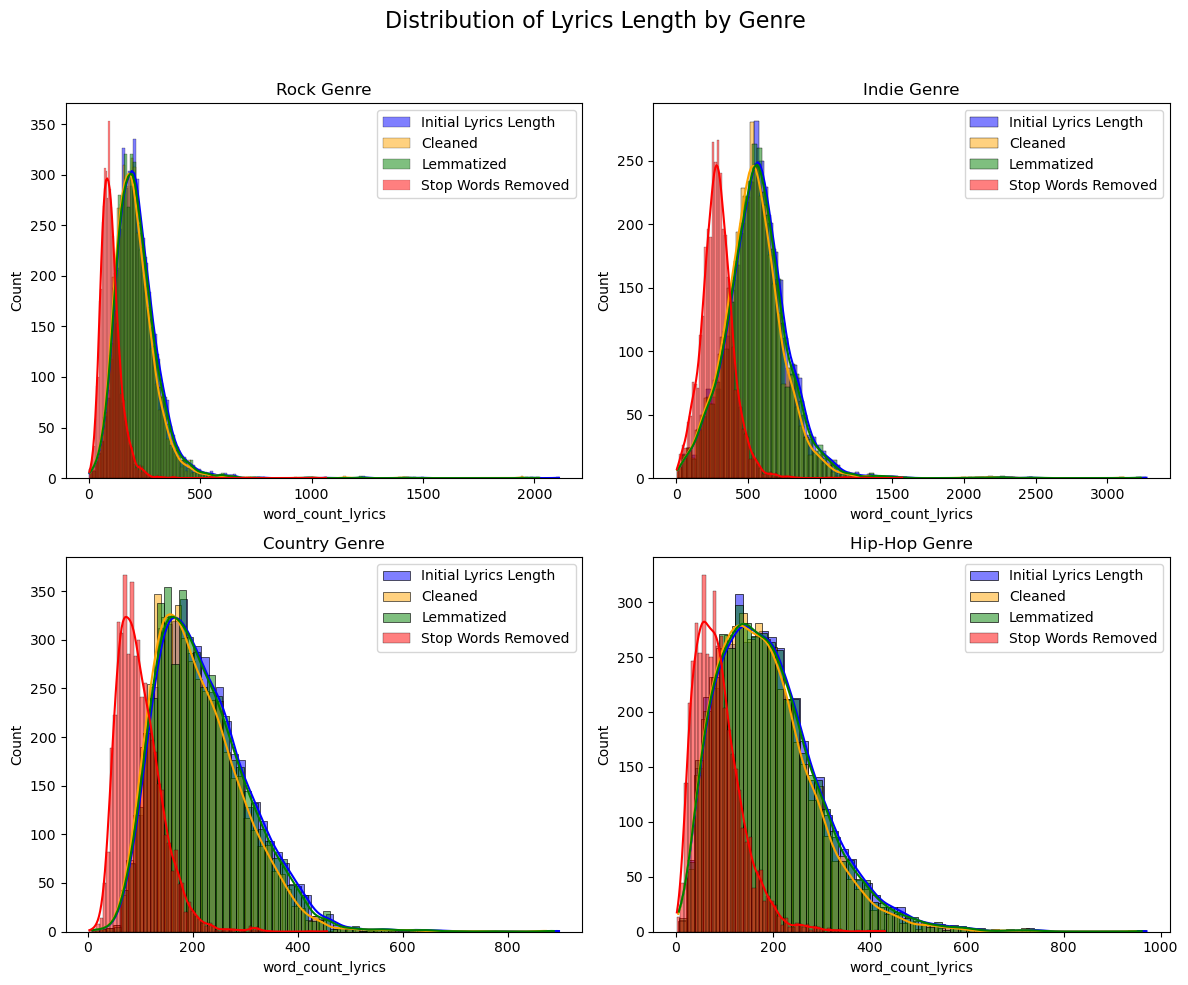

In [19]:

# Set up the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Lyrics Length by Genre', fontsize=16)

# List of genres to visualize (replace with your actual genres)
genres = ['Rock', 'Indie', 'Country', 'Hip-Hop']

# Create subplots for each genre
for i, genre in enumerate(genres):
    row, col = divmod(i, 2)
    subset_df = data[data['Genre'] == genre]
    sns.histplot(subset_df['word_count_lyrics'], kde=True, ax=axes[row, col], label='Initial Lyrics Length', color='blue')
    # Overlay distribution of Word Count on the same plot
    sns.histplot(subset_df['word_count_clean_lyrics'], kde=True, ax=axes[row, col], label='Cleaned', color='orange', alpha=0.5)
    # Overlay distribution of Word Count (lemmatized) on the same plot
    sns.histplot(subset_df['word_count_lemmatiz'], kde=True, ax=axes[row, col], label='Lemmatized', color='green', alpha=0.5)
    
    # Overlay distribution of Word Count (stop words removed) on the same plot
    sns.histplot(subset_df['word_count_stop_words'], kde=True, ax=axes[row, col], label='Stop Words Removed', color='red', alpha=0.5)
    
    axes[row, col].set_title(f'{genre} Genre')
    axes[row, col].legend(loc='upper right')  # Add legend for all distributions


# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [20]:
data.to_csv('Lyrics_Clean.csv', index=False)

In [23]:
from sklearn.model_selection import train_test_split

X = data['remove_stop_words'].copy()
y = data['Label'].astype(int).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('The proportion in y_train\n', y_train.value_counts(normalize=True).mul(100).rename('label'))
print('The proportion in y_test\n', y_test.value_counts(normalize=True).mul(100).rename('label'))
print('The proportion in data\n', data.Label.value_counts(normalize=True).mul(100).rename('label'))

The proportion in y_train
 Label
0    27.819056
3    27.221737
1    24.992716
2    19.966492
Name: label, dtype: float64
The proportion in y_test
 Label
0    27.818235
3    27.235654
1    24.992718
2    19.953394
Name: label, dtype: float64
The proportion in data
 Label
0    27.818892
3    27.224521
1    24.992716
2    19.963872
Name: label, dtype: float64


In [24]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)